# Part 1 (Perspective projection using 4 points)

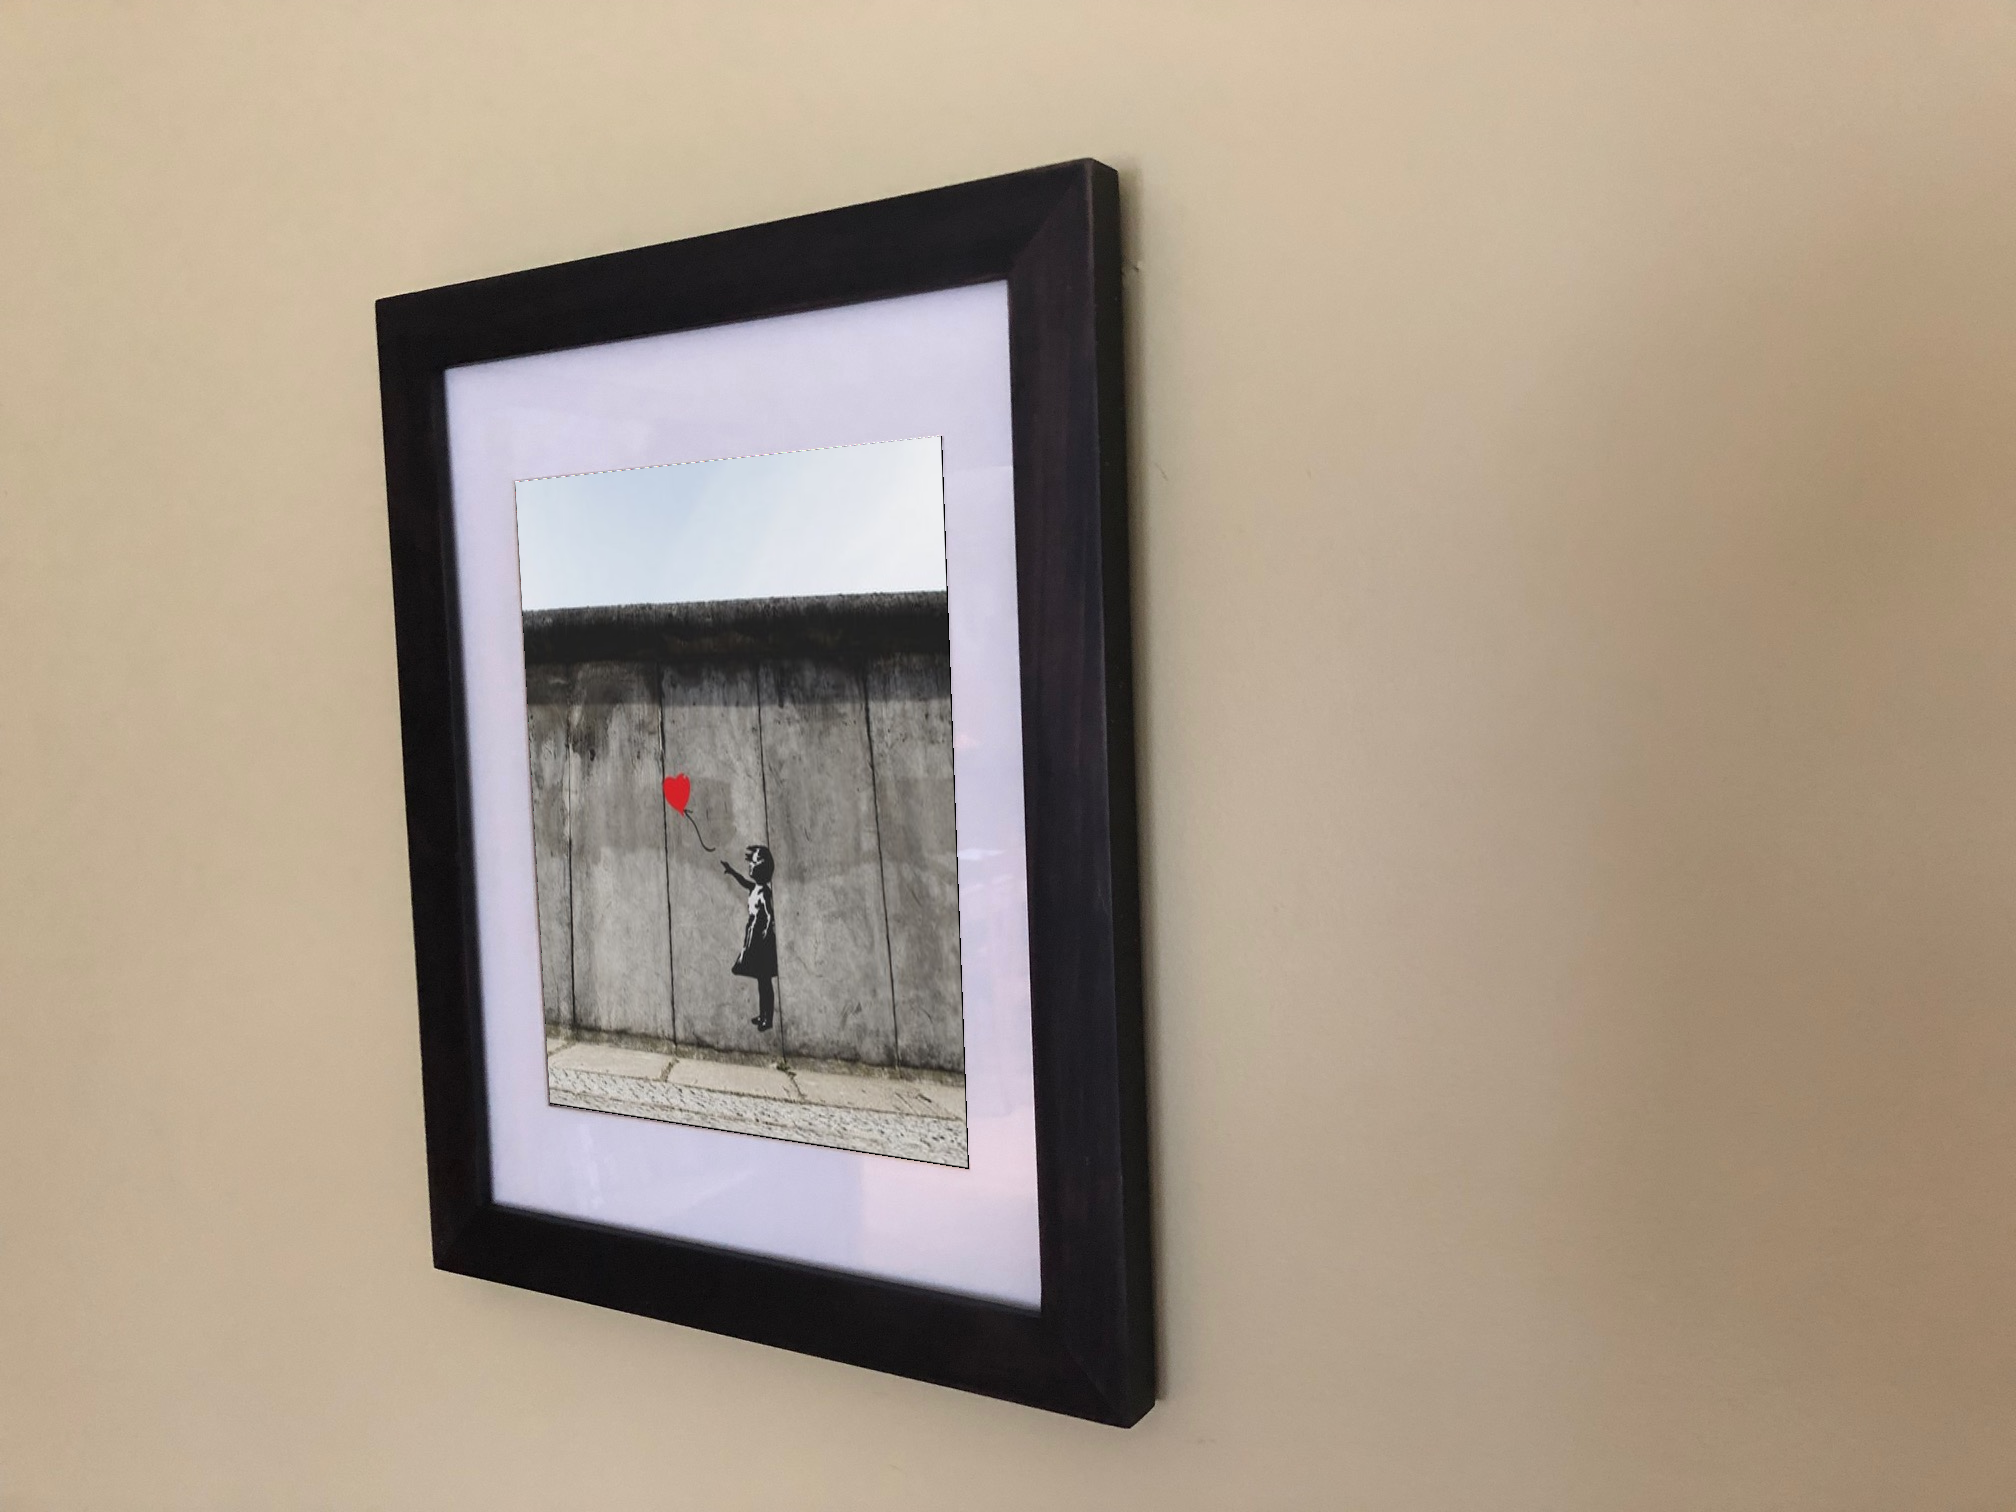

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from google.colab.patches import cv2_imshow

def mid_pt(num1, num2):
    return int(float(num1 + num2)/2)

def findhomogrpahy(points_img1, points_img2):
    A = []
    for i in range(len(points_img1)):
        xi, yi = points_img2[i]
        ui, vi = points_img1[i]
        A.append([-xi, -yi, -1, 0, 0, 0, ui * xi, ui * yi, ui])
        A.append([0, 0, 0, -xi, -yi, -1, vi * xi, vi * yi, vi])

    A = np.array(A)

    _, _, V = np.linalg.svd(A)

    H = V[-1].reshape(3, 3)

    return H

def get_points(img):
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    points_img = plt.ginput(n=4, timeout=0)
    plt.close()

    return np.array(points_img, dtype=np.float32)

img1 = cv2.imread("/content/iHW2_mage1.jpg")
img2 = cv2.imread("/content/HW2_image2.jpg")


# Picking points by hand img1 and img2
# points_img1 = get_points(img1)
# points_img2 = get_points(img2)
img1_tl = (515, 482)
img1_tr = (941, 436)
img1_bl = (550, 1103)
img1_br = (968, 1168)
points_img1 = np.array([img1_tl, img1_tr, img1_br, img1_bl])


height, width, _ = img2.shape
img2_tl = (0, 0)
img2_tr = (width, 0)
img2_bl = (0, height)
img2_br = (width, height)
points_img2 = np.array([img2_tl, img2_tr, img2_br, img2_bl])

H = findhomogrpahy(points_img1, points_img2)

img2_warped = cv2.warpPerspective(img2, H, (img1.shape[1], img1.shape[0]))

mask = np.zeros_like(img1[:, :, 0], dtype=np.uint8)
cv2.fillPoly(mask, [points_img1.astype(np.int32)], (255, 255, 255))

mask = cv2.bitwise_not(mask)

img1_region = cv2.bitwise_and(img1, img1, mask=mask)

result = cv2.bitwise_or(img2_warped, img1_region, mask=None)

cv2_imshow(result)

# Part 2 (Perspective projection using 8 points)

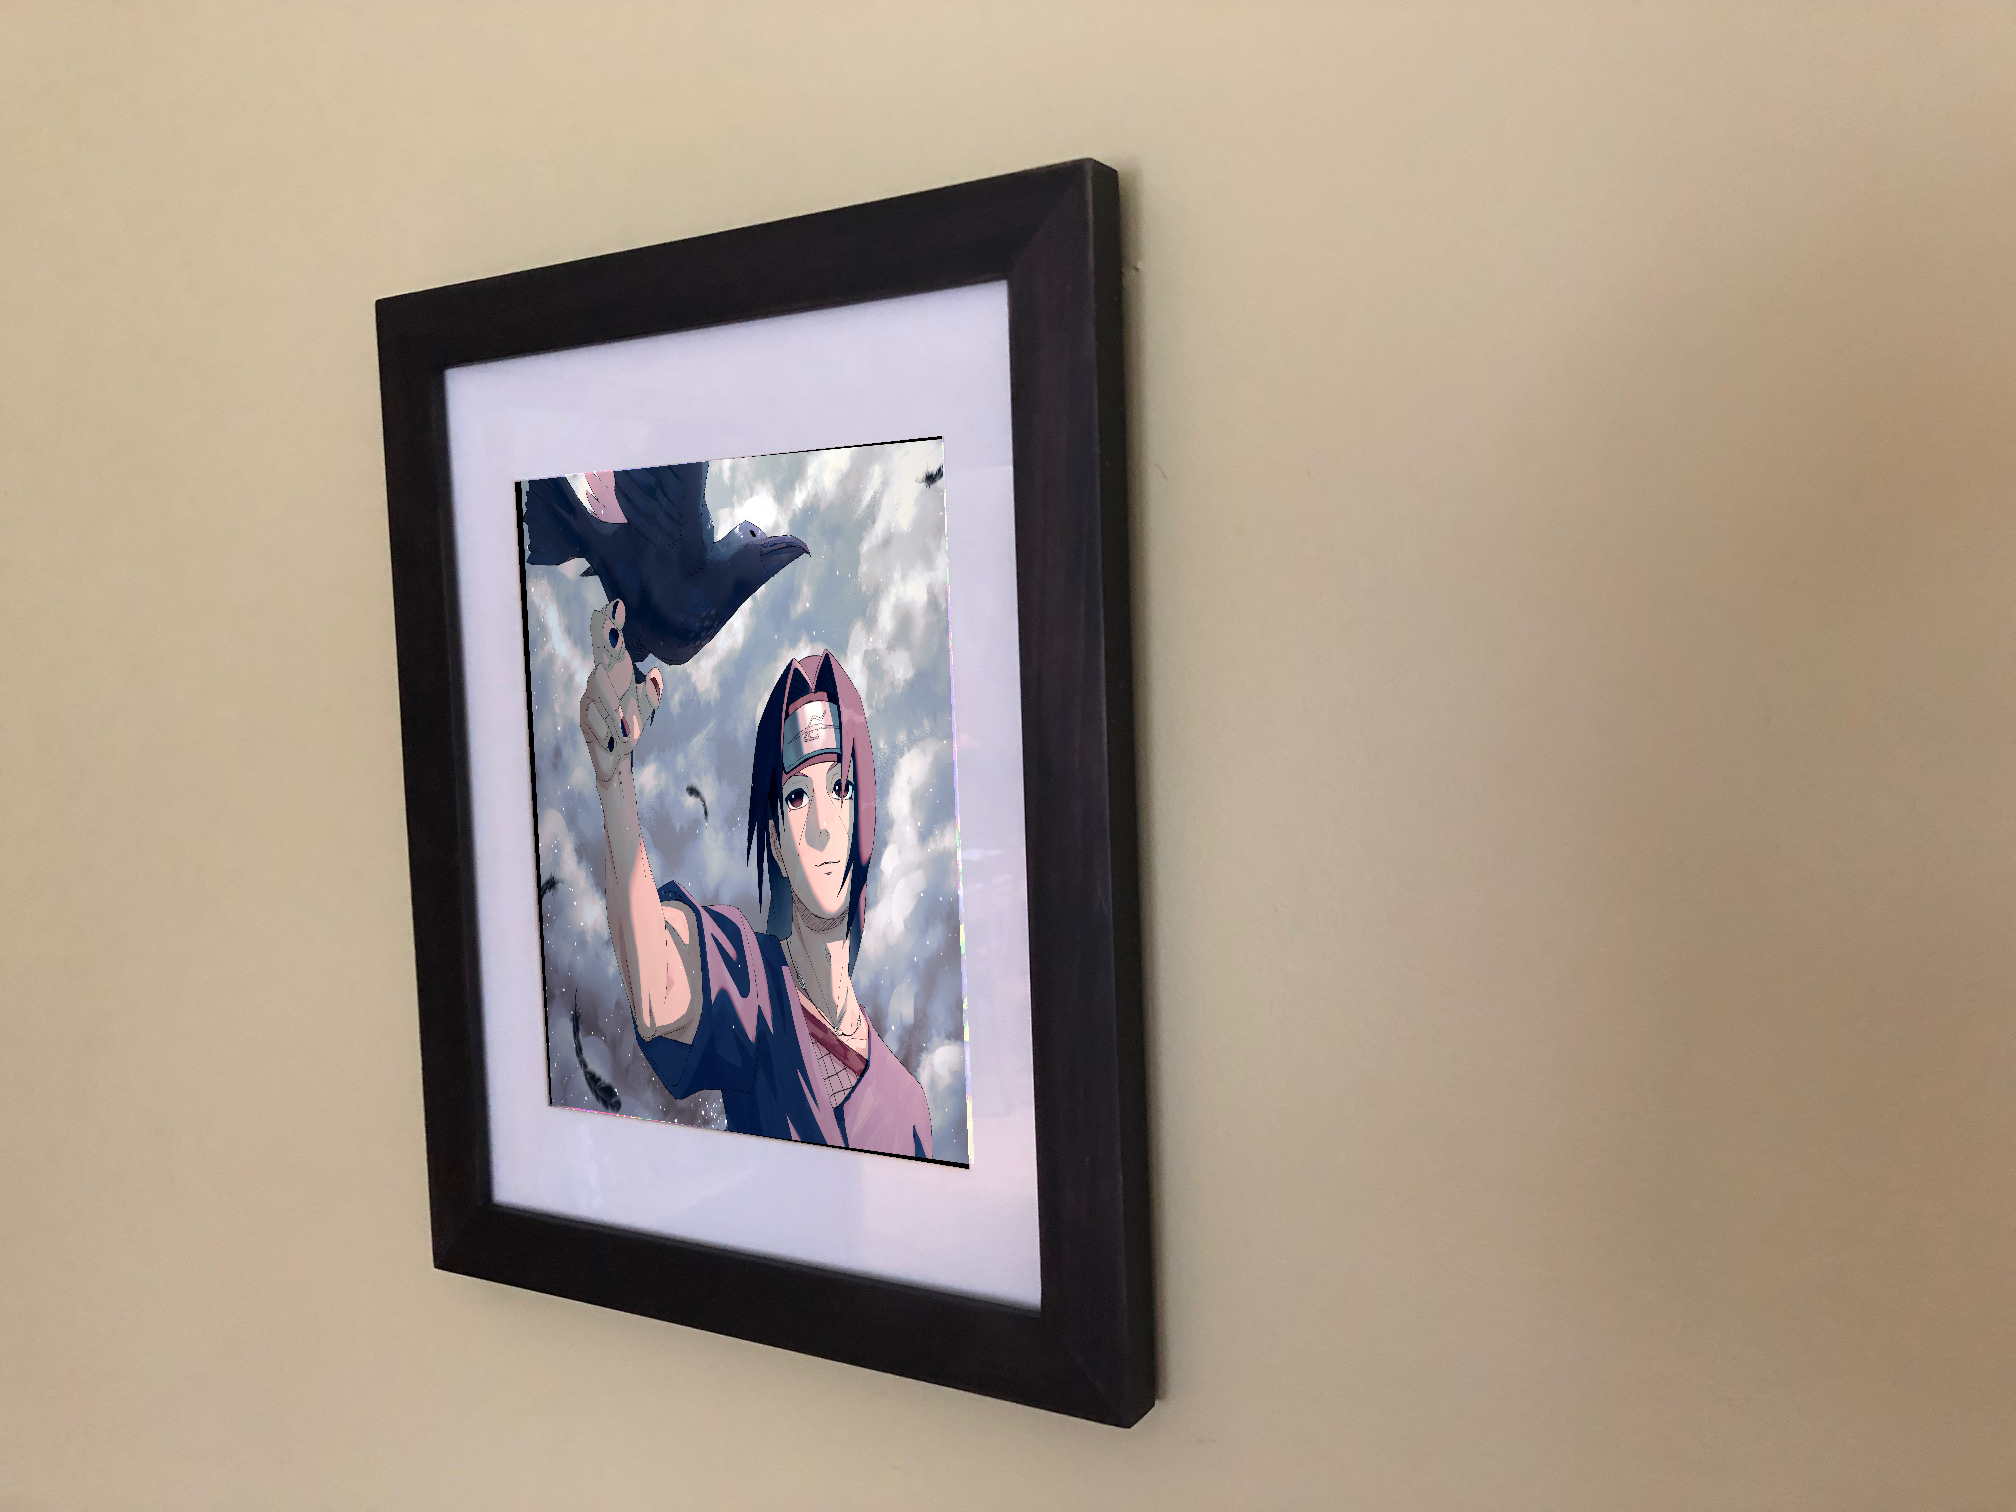

-1

In [3]:
img2 = cv2.imread("/content/HW2_image2_OWN.jpg")

img1_tl = (515, 482)
img1_tr = (941, 436)
img1_bl = (550, 1103)
img1_br = (968, 1168)
img1_tm = (mid_pt(img1_tl[0], img1_tr[0]), mid_pt(img1_tl[1], img1_tr[1]))
img1_bm = (mid_pt(img1_bl[0], img1_br[0]), mid_pt(img1_bl[1], img1_br[1]))
img1_rm = (mid_pt(img1_tr[0], img1_br[0]), mid_pt(img1_tr[1], img1_br[1]))
img1_lm = (mid_pt(img1_tl[0], img1_bl[0]), mid_pt(img1_tl[1], img1_bl[1]))
points_img1 = np.array([img1_tl, img1_tm, img1_tr, img1_rm, img1_br,img1_bm, img1_bl, img1_lm])

height, width, _ = img2.shape
img2_tl = (0, 0)
img2_tr = (width, 0)
img2_bl = (0, height)
img2_br = (width, height)
img2_tm = (mid_pt(img2_tl[0], img2_tr[0]), mid_pt(img2_tl[1], img2_tr[1]))
img2_bm = (mid_pt(img2_bl[0], img2_br[0]), mid_pt(img2_bl[1], img2_br[1]))
img2_rm = (mid_pt(img2_tr[0], img2_br[0]), mid_pt(img2_tr[1], img2_br[1]))
img2_lm = (mid_pt(img2_tl[0], img2_bl[0]), mid_pt(img2_tl[1], img2_bl[1]))
points_img2 = np.array([img2_tl, img2_tm, img2_tr, img2_rm, img2_br, img2_bm, img2_bl, img2_lm])

H = findhomogrpahy(points_img1, points_img2)

img2_warped = cv2.warpPerspective(img2, H, (img1.shape[1], img1.shape[0]))

mask = np.zeros_like(img1[:, :, 0], dtype=np.uint8)
cv2.fillPoly(mask, [points_img1.astype(np.int32)], (255, 255, 255))

mask = cv2.bitwise_not(mask)

img1_region = cv2.bitwise_and(img1, img1, mask=mask)

result = cv2.bitwise_or(img2_warped, img1_region, mask=None)

cv2_imshow(result)
cv2.waitKey(0)

# Part 3 (Image stitching)

> Display raw images



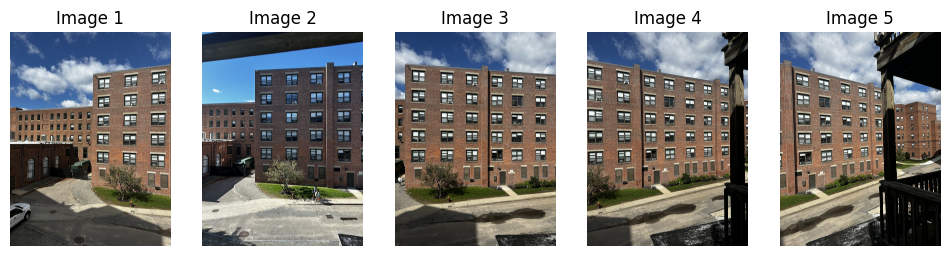

In [4]:
dir = "/content/"
img_list = [cv2.imread(dir + str(i) + ".jpg") for i in range(1,6)]

fig, axes = plt.subplots(1, len(img_list), figsize=(12, 4))

for i, img in enumerate(img_list):
    image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    axes[i].imshow(image)
    axes[i].set_title(f'Image {i + 1}')
    axes[i].axis('off')

plt.show()




> Getting points from images in the following manner: Corresponding points between image 1 and image 2, image 2 and image 3, image 3 and image4 and image 4 and image 5. Reference image is image 3 which is also the 3rd image, it is shown by "img_ref" in the code.



In [5]:
points_dict = {}

# points_ref = get_points(img_ref)
# points_4 = get_points(img4)
points_ref = [[1634.6227, 629.94], [2822.0508, 902.46454], [2828.5396, 2226.155], [1628.134, 2900.9775]]
points_4 = [[881.936, 591.00793], [2017.4547, 967.3513], [2023.9434, 2180.7341], [907.8907, 2926.9321]]
points_dict["p_ref_4"] = {"p_ref": points_ref, "p_4": points_4}
points_ref = np.array(points_ref, dtype=np.float32)
points_4 = np.array(points_4, dtype=np.float32)
H_ref_4 = findhomogrpahy(points_ref, points_4)



# points_4 = get_points(img4)
# points_5 = get_points(img5)
points_4 = [[868.9586, 591.00793], [2945.3357, 688.33813], [2964.8018, 2842.5793], [907.8907, 2926.9321]]
points_5 = [[70.851135, 526.12115], [2127.7622, 805.13434], [2199.1377, 2764.7153], [155.20395, 3063.1946]]
points_dict["p_4_5"] = {"p_4": points_4, "p_5": points_5}
points_4 = np.array(points_4, dtype=np.float32)
points_5 = np.array(points_5, dtype=np.float32)
H_4_5 = findhomogrpahy(points_4, points_5)
H_ref_5 = np.dot(H_ref_4, H_4_5)

# points_ref = get_points(img_ref)
# points_2 = get_points(img2)
points_ref = [[57.873775, 1369.6494], [181.15866, 2920.4436], [2140.7395, 668.8721], [2075.8528, 2862.0454]]
points_2 = [[907.8907, 1428.0475], [992.24347, 2816.6248], [2919.381, 552.07587], [2854.4941, 2907.4663]]
points_dict["p_ref_2"] = {"p_ref": points_ref, "p_2": points_2}
points_ref = np.array(points_ref, dtype=np.float32)
points_2 = np.array(points_2, dtype=np.float32)
H_ref_2 = findhomogrpahy(points_ref, points_2)


# points_2 = get_points(img2)
# points_1 = get_points(img1)
points_2 = [[96.80585, 1441.0248], [122.76056, 2647.919], [2257.536, 2394.8606], [2264.0244, 779.1796]]
points_1 = [[726.20764, 1525.3777], [713.2303, 2660.8965], [2912.8923, 2550.5889], [2919.381, 746.7362]]
points_dict["p_2_1"] = {"p_2": points_2, "p_1": points_1}
points_2 = np.array(points_2, dtype=np.float32)
points_1 = np.array(points_1, dtype=np.float32)
H_2_1 = findhomogrpahy(points_2, points_1)
H_ref_1 = np.dot(H_ref_2, H_2_1)

H_list = [H_ref_1, H_ref_2, np.eye(3), H_ref_4, H_ref_5]

> Function that creates the panorama



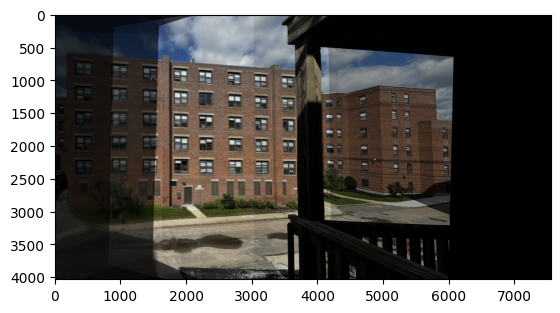

In [12]:
def panorama(img_list, H_list):

    canvas_height = img_list[0].shape[0]
    canvas_width = int(sum([img.shape[1] for img in img_list])/2)
    canvas_size = (canvas_width, canvas_height)

    # canvas = np.zeros((canvas_height, canvas_width, 3), dtype=np.uint8)

    #MAKES CLEAN PANORAMA BUT TAKES TOO MUCH TIME (INEFFICIENT)
    # for img,H in zip(img_list, H_list):
    #     # Warp the current image using the homography
    #     warped_image = cv2.warpPerspective(img, H, canvas_size)

    #     # Blend the warped image onto the stitched image
    #     mask = np.where(warped_image != 0, 1, 0)  # Create a binary mask
    #     canvas = canvas * (1 - mask) + warped_image * mask

    # canvas = cv2.resize(canvas, (int(canvas_width*0.5),int(canvas_height*0.5)))

    #EFFICIENT APPROACH BUT PANORAMA IS NOT AS CLEAN
    alpha_beta_dict = {1:{"alpha":0.6, "beta":0.4}, 2:{"alpha":0.6, "beta":0.4}, 3:{"alpha":0.5, "beta":0.5}, 4:{"alpha":0.4, "beta":0.6}}
    canvas = cv2.warpPerspective(img_list[0], H_list[0], canvas_size)
    for i in range(1, 5):
        warp = cv2.warpPerspective(img_list[i], H_list[i], canvas_size)
        canvas = cv2.addWeighted(canvas, alpha_beta_dict[i]["alpha"], warp, alpha_beta_dict[i]["beta"], 0)
    canvas = cv2.cvtColor(canvas, cv2.COLOR_BGR2RGB)
    plt.imshow(canvas)

panorama(img_list, H_list)

